In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("ecommerce.csv")
data

,Product_ID,Product_Name,Category,Warehouse_Location,Section,Quantity_Stored,Unit_Size,Total_Warehouse_Space,Cost_Per_Unit,Selling_Price_Per_Unit,Date_Recorded,Total_Space_Used,Utilization_Rate,Total_Cost,Total_Revenue,Profit
0,P0001,Product_1,Health & Beauty,"Aisle 3, Shelf 2",Perishables,225,0.38,6833,0.79,27.25,2024-09-09,85.50,1.25,177.75,6131.25,5953.50
1,P0002,Product_2,Electronics,"Aisle 14, Shelf 6",Refrigerated,370,0.71,11667,9.12,45.25,2024-09-11,262.70,2.25,3374.40,16742.50,13368.10
2,P0003,Product_3,Electronics,"Aisle 11, Shelf 6",Refrigerated,189,0.34,10888,12.95,6.22,2024-09-19,64.26,0.59,2447.55,1175.58,-1271.97
3,P0004,Product_4,Clothing,"Aisle 18, Shelf 8",Refrigerated,58,0.68,7039,13.52,3.63,2024-09-21,39.44,0.56,784.16,210.54,-573.62
4,P0005,Product_5,Books,"Aisle 14, Shelf 5",Refrigerated,39,0.60,16988,8.00,38.37,2024-09-20,23.40,0.14,312.00,1496.43,1184.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,Product_996,Electronics,"Aisle 10, Shelf 9",Perishables,16,1.12,8525,2.93,44.61,2024-09-12,17.92,0.21,46.88,713.76,666.88
996,P0997,Product_997,Health & Beauty,"Aisle 13, Shelf 4",Dry Goods,85,0.15,9147,14.70,17.28,2024-09-25,12.75,0.14,1249.50,1468.80,219.30
997,P0998,Product_998,Electronics,"Aisle 17, Shelf 1",Dry Goods,453,1.22,12059,10.44,34.44,2024-09-12,552.66,4.58,4729.32,15601.32,10872.00
998,P0999,Product_999,Clothing,"Aisle 3, Shelf 8",Dry Goods,258,0.18,17068,13.98,24.36,2024-09-29,46.44,0.27,3606.84,6284.88,2678.04


In [3]:
overall_utilization_rate = data['Utilization_Rate'].mean()

# utilization rate per section
section_utilization_rate = data.groupby('Section')['Utilization_Rate'].mean().reset_index()

print("Overall Warehouse Utilization Rate:", overall_utilization_rate)
print("\nSection-wise Utilization Rate:")
print(section_utilization_rate)

Overall Warehouse Utilization Rate: 1.74767

Section-wise Utilization Rate:
        Section  Utilization_Rate
0     Dry Goods          1.614087
1   Perishables          1.716028
2  Refrigerated          1.919716


In [4]:
space_used_by_category = data.groupby('Category')['Total_Space_Used'].sum().reset_index()

# total profit by category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

# two results to compare space usage and profitability
category_analysis = pd.merge(space_used_by_category, profit_by_category, on='Category')

# Sort to identify top categories utilizing space
category_analysis_sorted = category_analysis.sort_values(by='Total_Space_Used', ascending=False)

print("Category-wise Space Utilization and Profitability:")
print(category_analysis_sorted)

Category-wise Space Utilization and Profitability:
          Category  Total_Space_Used     Profit
3        Groceries          30434.97  611738.16
1         Clothing          29653.53  680497.07
2      Electronics          27965.82  658329.08
5  Home Appliances          27791.85  615259.78
4  Health & Beauty          24518.33  597681.83
0            Books          23759.69  550906.74
6             Toys          23586.18  647222.37


In [5]:
# Convert the 'Date_Recorded' column to datetime format
data['Date_Recorded'] = pd.to_datetime(data['Date_Recorded'])

# Group data by month and year to observe trends over time
data['Year_Month'] = data['Date_Recorded'].dt.to_period('M')

# Calculate total space used and total revenue over time (grouped by Year_Month)
space_utilization_over_time = data.groupby('Year_Month')['Total_Space_Used'].sum().reset_index()
revenue_over_time = data.groupby('Year_Month')['Total_Revenue'].sum().reset_index()

# Merge the space utilization and revenue data to analyze the trends together
trends_analysis = pd.merge(space_utilization_over_time, revenue_over_time, on='Year_Month')

# Calculate correlation between space utilization and revenue
correlation = trends_analysis['Total_Space_Used'].corr(trends_analysis['Total_Revenue'])

# Print the trends and the correlation result
print("Trends in Space Utilization and Revenue Over Time:")
print(trends_analysis)

Trends in Space Utilization and Revenue Over Time:
  Year_Month  Total_Space_Used  Total_Revenue
0    2024-08           5696.65      147250.07
1    2024-09         182013.72     6122895.72


In [6]:
# Define holding cost as the product of 'Cost_Per_Unit' and 'Quantity_Stored'
data['Holding_Cost'] = data['Cost_Per_Unit'] * data['Quantity_Stored']

# Calculate the overall average utilization rate
average_utilization_rate = data['Utilization_Rate'].mean()

# Filter products with low utilization (below average) and high holding cost
# Assume high holding cost is defined as above the average holding cost
average_holding_cost = data['Holding_Cost'].mean()
low_utilization_high_cost = data[(data['Utilization_Rate'] < average_utilization_rate) & 
                                 (data['Holding_Cost'] > average_holding_cost)]

# Select relevant columns to display
result = low_utilization_high_cost[['Product_ID', 'Product_Name', 'Utilization_Rate', 'Holding_Cost']]

# Print the results
print("Products with Low Utilization but High Holding Costs:")
print(result)

Products with Low Utilization but High Holding Costs:
    Product_ID Product_Name  Utilization_Rate  Holding_Cost
2        P0003    Product_3              0.59       2447.55
11       P0012   Product_12              1.05       2481.93
14       P0015   Product_15              0.06       3630.80
26       P0027   Product_27              0.20       4132.24
28       P0029   Product_29              1.27       4157.72
..         ...          ...               ...           ...
972      P0973  Product_973              1.55       2762.10
974      P0975  Product_975              0.11       2087.28
977      P0978  Product_978              1.36       3667.68
979      P0980  Product_980              1.68       3085.38
998      P0999  Product_999              0.27       3606.84

[177 rows x 4 columns]


In [7]:
# Calculate profit margin for each product, handling division by zero
data['Profit_Margin'] = data.apply(lambda row: (row['Profit'] / row['Total_Revenue'] * 100) 
                                   if row['Total_Revenue'] > 0 else 0, axis=1)

# Group by category to calculate the average profit margin for each category
profit_margin_by_category = data.groupby('Category')['Profit_Margin'].mean().reset_index()

# Sort the results by profit margin in descending order
profit_margin_by_category_sorted = profit_margin_by_category.sort_values(by='Profit_Margin', ascending=False)

# Print the results
print("Profit Margin by Product Category:")
print(profit_margin_by_category_sorted)

Profit Margin by Product Category:
          Category  Profit_Margin
6             Toys      55.515088
5  Home Appliances      47.320347
0            Books      43.928794
2      Electronics      43.689570
3        Groceries      43.331097
1         Clothing      43.031370
4  Health & Beauty      42.194902


In [8]:
# Convert the 'Date_Recorded' column to datetime format
data['Date_Recorded'] = pd.to_datetime(data['Date_Recorded'])

# Extract month and quarter from the date
data['Month'] = data['Date_Recorded'].dt.month
data['Quarter'] = data['Date_Recorded'].dt.quarter

# Group by month to analyze seasonal patterns in inventory levels (Quantity_Stored) and sales (Total_Revenue)
monthly_inventory = data.groupby('Month')['Quantity_Stored'].sum().reset_index()
monthly_sales = data.groupby('Month')['Total_Revenue'].sum().reset_index()

# Merge inventory and sales data for month-wise analysis
monthly_analysis = pd.merge(monthly_inventory, monthly_sales, on='Month')

# Group by quarter for a broader seasonal pattern analysis
quarterly_inventory = data.groupby('Quarter')['Quantity_Stored'].sum().reset_index()
quarterly_sales = data.groupby('Quarter')['Total_Revenue'].sum().reset_index()

# Merge inventory and sales data for quarter-wise analysis
quarterly_analysis = pd.merge(quarterly_inventory, quarterly_sales, on='Quarter')

# Print results
print("Monthly Inventory and Sales Patterns:")
print(monthly_analysis)
print("\nQuarterly Inventory and Sales Patterns:")
print(quarterly_analysis)

Monthly Inventory and Sales Patterns:
   Month  Quantity_Stored  Total_Revenue
0      8             6832      147250.07
1      9           244283     6122895.72

Quarterly Inventory and Sales Patterns:
   Quarter  Quantity_Stored  Total_Revenue
0        3           251115     6270145.79


In [9]:
# Calculate overall average utilization rate
average_utilization_rate = data['Utilization_Rate'].mean()

# Identify underperforming sections with below-average utilization rates
underperforming_sections = data.groupby('Section')['Utilization_Rate'].mean().reset_index()
underperforming_sections = underperforming_sections[underperforming_sections['Utilization_Rate'] < average_utilization_rate]

# Filter products in these underperforming sections
low_utilization_products = data[data['Section'].isin(underperforming_sections['Section'])]

# Sort by utilization rate and total space used
low_utilization_products_sorted = low_utilization_products.sort_values(by=['Utilization_Rate', 'Total_Space_Used'], ascending=[True, False])

# Display the top products with low utilization in underperforming sections
print("Low Utilization Products in Underperforming Sections:")
print(low_utilization_products_sorted[['Product_ID', 'Product_Name', 'Section', 'Utilization_Rate', 'Total_Space_Used']])

Low Utilization Products in Underperforming Sections:
    Product_ID Product_Name      Section  Utilization_Rate  Total_Space_Used
683      P0684  Product_684  Perishables              0.02              3.82
578      P0579  Product_579    Dry Goods              0.02              2.80
912      P0913  Product_913  Perishables              0.03              4.95
47       P0048   Product_48  Perishables              0.03              4.84
106      P0107  Product_107  Perishables              0.03              4.80
..         ...          ...          ...               ...               ...
84       P0085   Product_85    Dry Goods              7.68            603.88
324      P0325  Product_325  Perishables              7.77            501.81
991      P0992  Product_992  Perishables              7.95            537.12
644      P0645  Product_645    Dry Goods              9.23            514.60
183      P0184  Product_184  Perishables             10.39            606.91

[683 rows x 5 columns

In [10]:
# Calculate Inventory Turnover for each product
# Formula: Inventory Turnover = COGS (Total_Cost) / Average Inventory (Quantity_Stored)
data['Inventory_Turnover'] = data['Total_Cost'] / data['Quantity_Stored']

# Group by section to calculate the average inventory turnover for each section
inventory_turnover_by_section = data.groupby('Section')['Inventory_Turnover'].mean().reset_index()

# Sort the results by inventory turnover in descending order
inventory_turnover_by_section_sorted = inventory_turnover_by_section.sort_values(by='Inventory_Turnover', ascending=False)

# Print results
print("Inventory Turnover by Section:")
print(inventory_turnover_by_section_sorted)

Inventory Turnover by Section:
        Section  Inventory_Turnover
2  Refrigerated            7.883849
1   Perishables            7.460806
0     Dry Goods            7.319690


In [11]:
if 'Promotional_Flag' in data.columns:

    # Separate promoted and non-promoted products
    promoted = data[data['Promotional_Flag'] == 1]
    non_promoted = data[data['Promotional_Flag'] == 0]
    
    # Calculate average space utilization for promoted vs non-promoted products
    avg_utilization_promoted = promoted['Utilization_Rate'].mean()
    avg_utilization_non_promoted = non_promoted['Utilization_Rate'].mean()

    # Calculate total sales (revenue) for promoted vs non-promoted products
    total_sales_promoted = promoted['Total_Revenue'].sum()
    total_sales_non_promoted = non_promoted['Total_Revenue'].sum()

    # Display the analysis
    print(f"Average Space Utilization (Promoted): {avg_utilization_promoted:.2f}")
    print(f"Average Space Utilization (Non-Promoted): {avg_utilization_non_promoted:.2f}")
    print(f"Total Sales (Promoted): {total_sales_promoted:.2f}")
    print(f"Total Sales (Non-Promoted): {total_sales_non_promoted:.2f}")
    
else:
    print("No 'Promotional_Flag' column found in the dataset.")
    
# Assume promotions involve a significant price drop (e.g., >20% drop in 'Selling_Price_Per_Unit')
data['Price_Drop'] = data['Selling_Price_Per_Unit'].diff().fillna(0) < -0.2 * data['Selling_Price_Per_Unit']

# Mark these products as promoted
data['Promotional_Flag'] = data['Price_Drop'].astype(int)

# Apply the previous analysis to calculate the impact of promotions
promoted = data[data['Promotional_Flag'] == 1]
non_promoted = data[data['Promotional_Flag'] == 0]

# Calculate average space utilization and sales for promoted vs non-promoted products
avg_utilization_promoted = promoted['Utilization_Rate'].mean()
avg_utilization_non_promoted = non_promoted['Utilization_Rate'].mean()

total_sales_promoted = promoted['Total_Revenue'].sum()
total_sales_non_promoted = non_promoted['Total_Revenue'].sum()

# Display the results
print(f"Average Space Utilization (Promoted): {avg_utilization_promoted:.2f}")
print(f"Average Space Utilization (Non-Promoted): {avg_utilization_non_promoted:.2f}")
print(f"Total Sales (Promoted): {total_sales_promoted:.2f}")
print(f"Total Sales (Non-Promoted): {total_sales_non_promoted:.2f}")

No 'Promotional_Flag' column found in the dataset.
Average Space Utilization (Promoted): 1.83
Average Space Utilization (Non-Promoted): 1.69
Total Sales (Promoted): 1449007.59
Total Sales (Non-Promoted): 4821138.20


In [12]:
# Calculate holding cost (storage cost) for each product as Cost_Per_Unit * Quantity_Stored
data['Holding_Cost'] = data['Cost_Per_Unit'] * data['Quantity_Stored']

# Calculate total storage cost by category (sum of holding costs)
storage_cost_by_category = data.groupby('Category')['Holding_Cost'].sum().reset_index()

# Calculate total profit by category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

# Merge storage cost and profit data
cost_benefit_analysis = pd.merge(storage_cost_by_category, profit_by_category, on='Category')

# Calculate the cost-to-benefit ratio (storage cost / profit)
cost_benefit_analysis['Cost_to_Benefit_Ratio'] = cost_benefit_analysis['Holding_Cost'] / cost_benefit_analysis['Profit']

# Sort by cost-to-benefit ratio to identify categories with the highest and lowest ratios
cost_benefit_analysis_sorted = cost_benefit_analysis.sort_values(by='Cost_to_Benefit_Ratio', ascending=True)

# Print the cost-benefit analysis results
print("Cost-Benefit Analysis of Storing Product Categories:")
print(cost_benefit_analysis_sorted)

Cost-Benefit Analysis of Storing Product Categories:
          Category  Holding_Cost     Profit  Cost_to_Benefit_Ratio
6             Toys     239740.08  647222.37               0.370414
1         Clothing     271852.45  680497.07               0.399491
5  Home Appliances     265939.39  615259.78               0.432239
0            Books     243767.39  550906.74               0.442484
2      Electronics     292601.97  658329.08               0.444462
4  Health & Beauty     280151.42  597681.83               0.468730
3        Groceries     314458.06  611738.16               0.514040


In [13]:
# Calculate holding cost for each product
data['Holding_Cost'] = data['Cost_Per_Unit'] * data['Quantity_Stored']

# Aggregate holding costs by product category
holding_cost_by_category = data.groupby('Category')['Holding_Cost'].sum().reset_index()

# Aggregate holding costs by warehouse section
holding_cost_by_section = data.groupby('Section')['Holding_Cost'].sum().reset_index()

# Sort the results by holding cost to identify the highest and lowest categories/sections
holding_cost_by_category_sorted = holding_cost_by_category.sort_values(by='Holding_Cost', ascending=False)
holding_cost_by_section_sorted = holding_cost_by_section.sort_values(by='Holding_Cost', ascending=False)

# Display the comparison
print("Holding Costs by Product Category:")
print(holding_cost_by_category_sorted)

print("\nHolding Costs by Warehouse Section:")
print(holding_cost_by_section_sorted)

Holding Costs by Product Category:
          Category  Holding_Cost
3        Groceries     314458.06
2      Electronics     292601.97
4  Health & Beauty     280151.42
1         Clothing     271852.45
5  Home Appliances     265939.39
0            Books     243767.39
6             Toys     239740.08

Holding Costs by Warehouse Section:
        Section  Holding_Cost
1   Perishables     679325.08
2  Refrigerated     631435.46
0     Dry Goods     597750.22


In [14]:
# Calculate total space allocation by product category
space_allocation_by_category = data.groupby('Category')['Total_Space_Used'].sum().reset_index()

# Calculate total sales volume by product category (use either Total_Revenue or Quantity_Sold)
sales_volume_by_category = data.groupby('Category')['Total_Revenue'].sum().reset_index()

# Merge the space allocation and sales volume data
space_vs_sales = pd.merge(space_allocation_by_category, sales_volume_by_category, on='Category')

# Calculate the space-to-sales ratio (to check alignment between space and sales volume)
space_vs_sales['Space_to_Sales_Ratio'] = space_vs_sales['Total_Space_Used'] / space_vs_sales['Total_Revenue']

# Sort to identify categories with the highest and lowest space-to-sales ratios
space_vs_sales_sorted = space_vs_sales.sort_values(by='Space_to_Sales_Ratio', ascending=False)

# Display the comparison
print("Space Allocation vs Sales Volume by Product Category:")
print(space_vs_sales_sorted)

Space Allocation vs Sales Volume by Product Category:
          Category  Total_Space_Used  Total_Revenue  Space_to_Sales_Ratio
3        Groceries          30434.97      926196.22              0.032860
5  Home Appliances          27791.85      881199.17              0.031539
1         Clothing          29653.53      952349.52              0.031137
0            Books          23759.69      794674.13              0.029899
2      Electronics          27965.82      950931.05              0.029409
4  Health & Beauty          24518.33      877833.25              0.027931
6             Toys          23586.18      886962.45              0.026592


In [15]:
data.columns

Index(['Product_ID', 'Product_Name', 'Category', 'Warehouse_Location',
       'Section', 'Quantity_Stored', 'Unit_Size', 'Total_Warehouse_Space',
       'Cost_Per_Unit', 'Selling_Price_Per_Unit', 'Date_Recorded',
       'Total_Space_Used', 'Utilization_Rate', 'Total_Cost', 'Total_Revenue',
       'Profit', 'Year_Month', 'Holding_Cost', 'Profit_Margin', 'Month',
       'Quarter', 'Inventory_Turnover', 'Price_Drop', 'Promotional_Flag'],
      dtype='object')

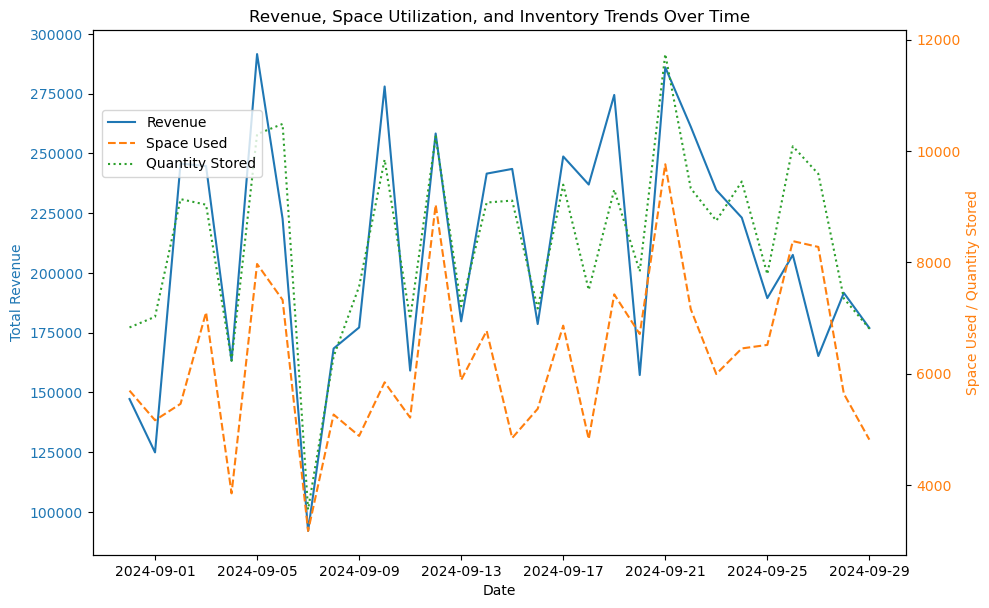

Correlation Matrix:
                  Total_Revenue    Profit  Total_Space_Used  Utilization_Rate  \
Total_Revenue          1.000000  0.974302          0.592406          0.058247   
Profit                 0.974302  1.000000          0.465690         -0.028520   
Total_Space_Used       0.592406  0.465690          1.000000          0.528396   
Utilization_Rate       0.058247 -0.028520          0.528396          1.000000   
Quantity_Stored        0.830247  0.707163          0.846658          0.266769   

                  Quantity_Stored  
Total_Revenue            0.830247  
Profit                   0.707163  
Total_Space_Used         0.846658  
Utilization_Rate         0.266769  
Quantity_Stored          1.000000  


In [16]:
# Convert 'Date_Recorded' to datetime for time-based analysis
data['Date_Recorded'] = pd.to_datetime(data['Date_Recorded'])

# Aggregate the data over time to capture trends in revenue, space utilization, and quantity stored
daily_data = data.groupby('Date_Recorded').agg({
    'Total_Revenue': 'sum',
    'Profit': 'sum',
    'Total_Space_Used': 'sum',
    'Utilization_Rate': 'mean',
    'Quantity_Stored': 'sum'
}).reset_index()

# Plot the trends in revenue, profit, space utilization, and inventory over time
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Revenue', color='tab:blue')
ax1.plot(daily_data['Date_Recorded'], daily_data['Total_Revenue'], color='tab:blue', label='Revenue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin axis to plot space utilization and inventory levels
ax2 = ax1.twinx()
ax2.set_ylabel('Space Used / Quantity Stored', color='tab:orange')
ax2.plot(daily_data['Date_Recorded'], daily_data['Total_Space_Used'], color='tab:orange', label='Space Used', linestyle='--')
ax2.plot(daily_data['Date_Recorded'], daily_data['Quantity_Stored'], color='tab:green', label='Quantity Stored', linestyle=':')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add legends for both plots
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))

# Show the plot
plt.title("Revenue, Space Utilization, and Inventory Trends Over Time")
plt.show()

# Calculate correlation between revenue, profit, space utilization, and inventory levels
correlations = daily_data[['Total_Revenue', 'Profit', 'Total_Space_Used', 'Utilization_Rate', 'Quantity_Stored']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlations)

In [17]:

# Add hypothetical demand rate and lead time for analysis
np.random.seed(42)  # For reproducibility

# Adding lead time (days) and demand rate (units/day) columns
data['Lead_Time'] = np.random.randint(1, 10, data.shape[0])
data['Demand_Rate'] = np.random.uniform(1, 5, data.shape[0])  # units per day (hypothetical)

# Define safety factor (common safety factor is 1.5 for high-demand products)
safety_factor = 1.5

# Calculate reorder point: Lead Time * Demand Rate
data['Reorder_Point'] = data['Lead_Time'] * data['Demand_Rate']

# Calculate safety stock: Safety factor * sqrt(Lead Time * Demand Rate variance)
# Assume variance in demand is proportional to the average demand rate (for simplicity)
demand_variance = data['Demand_Rate'].var()
data['Safety_Stock'] = safety_factor * np.sqrt(data['Lead_Time'] * demand_variance)

# Calculate total stock needed: Reorder Point + Safety Stock
data['Total_Stock_Needed'] = data['Reorder_Point'] + data['Safety_Stock']

# Calculate space utilization: Total Stock Needed * Unit Size
data['Space_Utilization'] = data['Total_Stock_Needed'] * data['Unit_Size']

# Display relevant results
data[['Product_Name', 'Lead_Time', 'Demand_Rate', 'Reorder_Point', 'Safety_Stock', 'Total_Stock_Needed', 'Space_Utilization']].head()


,Product_Name,Lead_Time,Demand_Rate,Reorder_Point,Safety_Stock,Total_Stock_Needed,Space_Utilization
0,Product_1,7,1.924299,13.470094,4.651149,18.121243,6.886072
1,Product_2,4,3.687571,14.750284,3.515938,18.266222,12.969017
2,Product_3,8,1.078842,8.630737,4.972287,13.603024,4.625028
3,Product_4,5,1.416434,7.082172,3.930938,11.013110,7.488915
4,Product_5,7,4.199664,29.397650,4.651149,34.048799,20.429279


In [18]:

# Simulating forecasted sales and comparing with actual sales (Demand_Rate can represent actual sales rate)
np.random.seed(42)

# Simulate forecasted demand (slightly different from actual demand)
data['Forecasted_Demand'] = data['Demand_Rate'] * np.random.uniform(0.8, 1.2, data.shape[0])

# Calculate forecast error (absolute and percentage)
data['Forecast_Error'] = data['Forecasted_Demand'] - data['Demand_Rate']
data['Forecast_Error_Percentage'] = (data['Forecast_Error'] / data['Demand_Rate']) * 100

# Calculate accuracy (100% - absolute percentage error)
data['Forecast_Accuracy'] = 100 - data['Forecast_Error_Percentage'].abs()

# Calculate the effect of forecast error on inventory levels
# Assume safety stock adjustments based on forecast error
data['Adjusted_Safety_Stock'] = data['Safety_Stock'] + (data['Forecast_Error'] * data['Lead_Time'])

# Adjust total stock needed based on forecast error
data['Adjusted_Total_Stock_Needed'] = data['Reorder_Point'] + data['Adjusted_Safety_Stock']

# Display forecast accuracy and its effect on inventory
data[['Product_Name', 'Demand_Rate', 'Forecasted_Demand', 'Forecast_Error_Percentage', 'Forecast_Accuracy', 
    'Safety_Stock', 'Adjusted_Safety_Stock', 'Total_Stock_Needed', 'Adjusted_Total_Stock_Needed']].head()


,Product_Name,Demand_Rate,Forecasted_Demand,Forecast_Error_Percentage,Forecast_Accuracy,Safety_Stock,Adjusted_Safety_Stock,Total_Stock_Needed,Adjusted_Total_Stock_Needed
0,Product_1,1.924299,1.827730,-5.018395,94.981605,4.651149,3.975166,18.121243,17.445260
1,Product_2,3.687571,4.352387,18.028572,81.971428,3.515938,6.175203,18.266222,20.925487
2,Product_3,1.078842,1.178956,9.279758,90.720242,4.972287,5.773199,13.603024,14.403936
3,Product_4,1.416434,1.472332,3.946339,96.053661,3.930938,4.210425,11.013110,11.292596
4,Product_5,4.199664,3.621822,-13.759254,86.240746,4.651149,0.606251,34.048799,30.003902


In [19]:
# Assume a 10% improvement in space utilization due to improved operational efficiency
improvement_factor = 0.9  # 10% reduction in space usage

# Apply the improvement to space utilization
data['Improved_Space_Utilization'] = data['Space_Utilization'] * improvement_factor

# Compare the original and improved space utilization
data[['Product_Name', 'Space_Utilization', 'Improved_Space_Utilization']].head()


,Product_Name,Space_Utilization,Improved_Space_Utilization
0,Product_1,6.886072,6.197465
1,Product_2,12.969017,11.672116
2,Product_3,4.625028,4.162525
3,Product_4,7.488915,6.740023
4,Product_5,20.429279,18.386351


In [20]:
# Assume vertical storage reduces space needs by 20%
vertical_efficiency_factor = 0.8  # 20% reduction in floor space used

# Calculate energy consumption before and after vertical space optimization
# Assume energy consumption is proportional to space utilization
data['Original_Energy_Consumption'] = data['Space_Utilization'] * 0.5  # Hypothetical energy use per unit space
data['Reduced_Energy_Consumption'] = data['Original_Energy_Consumption'] * vertical_efficiency_factor

# Display the energy savings
data[['Product_Name', 'Original_Energy_Consumption', 'Reduced_Energy_Consumption']].head()


,Product_Name,Original_Energy_Consumption,Reduced_Energy_Consumption
0,Product_1,3.443036,2.754429
1,Product_2,6.484509,5.187607
2,Product_3,2.312514,1.850011
3,Product_4,3.744457,2.995566
4,Product_5,10.214640,8.171712


In [21]:
# If there is a column representing energy consumption, calculate total energy used
if 'energy_consumption' in data.columns:
    total_energy = data['energy_consumption'].sum()
    print(f"\nTotal Energy Consumption: {total_energy} kWh")

# If there is an occupancy rate column, calculate average occupancy
if 'occupancy_rate' in data.columns:
    avg_occupancy = data['occupancy_rate'].mean()
    print(f"\nAverage Occupancy Rate: {avg_occupancy}%")

Average Space Utilization per Aisle:
    Aisle  Utilization_Rate
0       1          1.680000
1       2          1.966271
2       3          1.895333
3       4          1.697059
4       5          1.841042
5       6          1.542791
6       7          1.713846
7       8          1.122045
8       9          1.956885
9      10          1.611961
10     11          2.024310
11     12          1.555366
12     13          1.654286
13     14          1.767143
14     15          1.811923
15     16          1.440750
16     17          1.810408
17     18          1.908163
18     19          1.754667
19     20          1.813871

Average Profit per Aisle:
    Aisle       Profit
0       1  5442.617000
1       2  3823.924746
2       3  4224.349167
3       4  4124.105588
4       5  4558.876250
5       6  4800.661628
6       7  4026.300000
7       8  3957.931364
8       9  4199.683607
9      10  5176.725490
10     11  4014.312241
11     12  4014.399024
12     13  3742.394643
13     14  4032.219286
14 

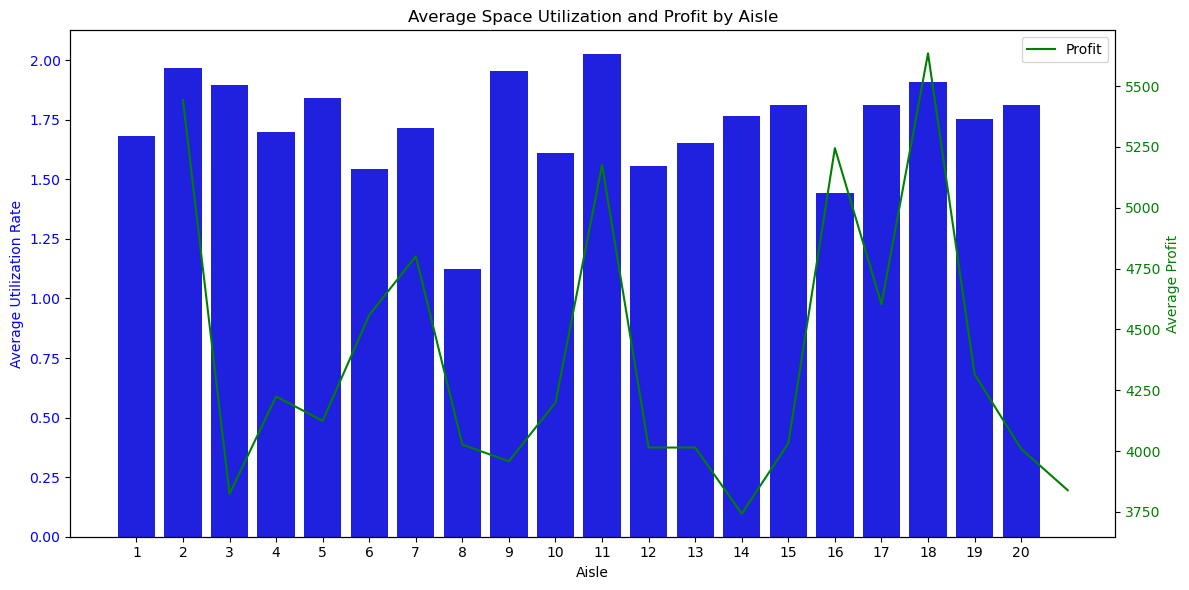


Average Space Utilization and Profit by Section:
        Section  Utilization_Rate       Profit
0     Dry Goods          1.614087  4482.640836
1   Perishables          1.716028  4389.712028
2  Refrigerated          1.919716  4206.453344


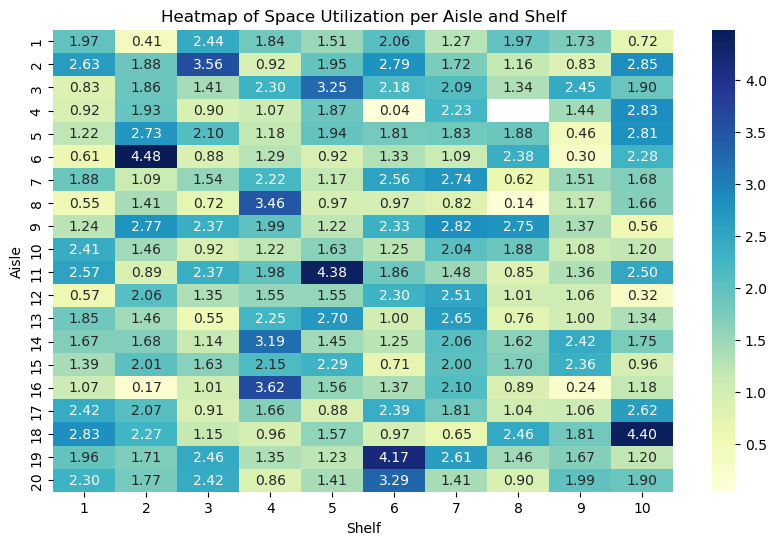

In [22]:

# Split the 'Warehouse_Location' column into 'Aisle' and 'Shelf'
data[['Aisle', 'Shelf']] = data['Warehouse_Location'].str.extract(r'Aisle (\d+), Shelf (\d+)')

# Convert 'Aisle' and 'Shelf' to numeric types for analysis
data['Aisle'] = pd.to_numeric(data['Aisle'])
data['Shelf'] = pd.to_numeric(data['Shelf'])

# 1. Average Space Utilization per Aisle
aisle_utilization = data.groupby('Aisle')['Utilization_Rate'].mean().reset_index()
print("Average Space Utilization per Aisle:")
print(aisle_utilization)

# 2. Average Profit per Aisle (Operational Efficiency)
aisle_profit = data.groupby('Aisle')['Profit'].mean().reset_index()
print("\nAverage Profit per Aisle:")
print(aisle_profit)

# 3. Plot Space Utilization and Profit by Aisle
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Utilization Rate
sns.barplot(x='Aisle', y='Utilization_Rate', data=aisle_utilization, ax=ax1, color='blue', label='Utilization Rate')
ax1.set_xlabel('Aisle')
ax1.set_ylabel('Average Utilization Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Twin the axis to plot Profit on the same x-axis (Aisle)
ax2 = ax1.twinx()
sns.lineplot(x='Aisle', y='Profit', data=aisle_profit, ax=ax2, color='green', label='Profit')
ax2.set_ylabel('Average Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Average Space Utilization and Profit by Aisle')
plt.tight_layout()
plt.show()

# 4. Space Utilization and Profit by Warehouse Section
section_analysis = data.groupby('Section').agg({
    'Utilization_Rate': 'mean',
    'Profit': 'mean'
}).reset_index()

print("\nAverage Space Utilization and Profit by Section:")
print(section_analysis)

# 5. Heatmap of Space Utilization per Aisle and Shelf (Visualize Warehouse Layout Efficiency)
pivot_table = data.pivot_table(values='Utilization_Rate', index='Aisle', columns='Shelf', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Heatmap of Space Utilization per Aisle and Shelf')
plt.xlabel('Shelf')
plt.ylabel('Aisle')
plt.show()


Average Utilization Rate per Category:
          Category  Utilization_Rate
0            Books          1.776512
1         Clothing          1.784324
2      Electronics          1.838897
3        Groceries          1.894392
4  Health & Beauty          1.541959
5  Home Appliances          1.657862
6             Toys          1.743139

Correlation between Utilization Rate and Profitability: 0.22


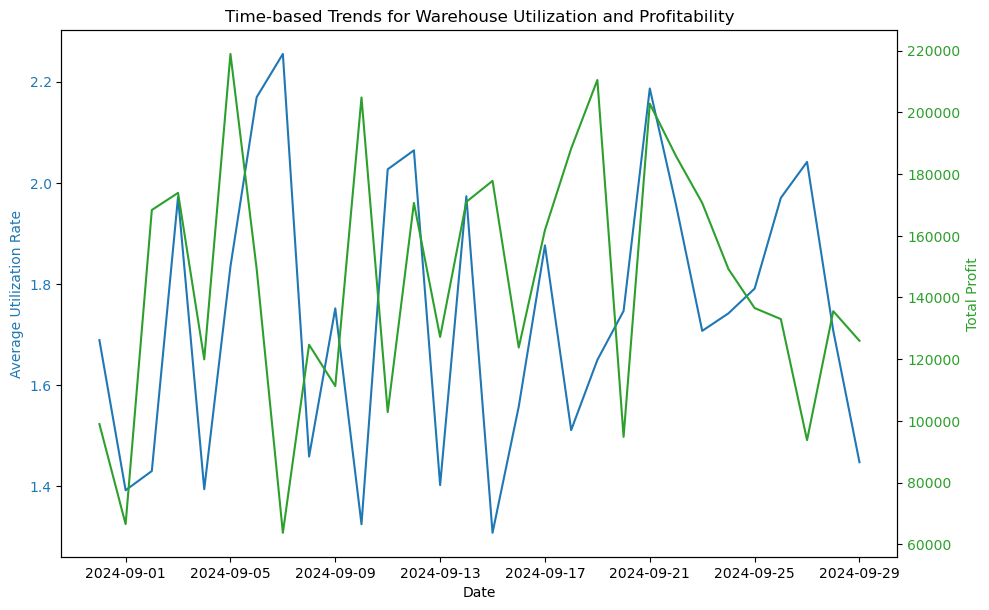

In [23]:
data['Date_Recorded'] = pd.to_datetime(data['Date_Recorded'])

# 1. Average Utilization Rates across Categories
category_utilization = data.groupby('Category')['Utilization_Rate'].mean().reset_index()
print("Average Utilization Rate per Category:")
print(category_utilization)

# 2. Correlation between Space Utilization and Profitability
correlation = data[['Utilization_Rate', 'Profit']].corr().iloc[0,1]
print(f"\nCorrelation between Utilization Rate and Profitability: {correlation:.2f}")

# 3. Time-based trends for Space Utilization and Profitability
# Group by date and calculate mean utilization and total profit
time_trends = data.groupby('Date_Recorded').agg({
    'Utilization_Rate': 'mean',
    'Profit': 'sum'
}).reset_index()

# Plotting the time trends
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Utilization Rate', color=color)
ax1.plot(time_trends['Date_Recorded'], time_trends['Utilization_Rate'], color=color, label='Avg Utilization Rate')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for Profitability
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Profit', color=color)
ax2.plot(time_trends['Date_Recorded'], time_trends['Profit'], color=color, label='Total Profit')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Time-based Trends for Warehouse Utilization and Profitability')
plt.show()